In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data from CSV file
df = pd.read_csv('best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data from CSV file
df = pd.read_csv('best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv')

cf = pd.read_csv('chassis_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv')

join = pd.merge(df,cf, how= "inner")

# Display the first few rows of the dataframe
print(df.head())

# Select features for clustering (replace with your actual column names)
X = df[['latitude', 'longitude', 'latitudeStdDev', 'longitudeStdDev', 'numSatsInSolution']].values  # Add as many features as needed


   Unnamed: 0          time  heightStdDev  longitudeStdDev  \
0           0  1.694450e+18      0.030676         0.012783   
1           0  1.694450e+18      0.218763         0.136896   
2           1  1.694450e+18      0.027027         0.013242   
3           0  1.694450e+18      0.021111         0.010912   
4           0  1.694450e+18      0.019266         0.008685   

                        groupMetadataID  latitudeStdDev  differentialAge  \
0  58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.012411              1.0   
1  58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.080366              1.0   
2  58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.015331              1.0   
3  58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.011871              1.0   
4  58263e34-a45c-11ee-88ec-eb6a8d5269b4        0.010546              1.0   

   longitude     solType  solutionAge     solStatus   latitude  \
0 -82.135228  NARROW_INT          0.0  SOL_COMPUTED  39.378104   
1 -82.143940  NARROW_INT          0.0 

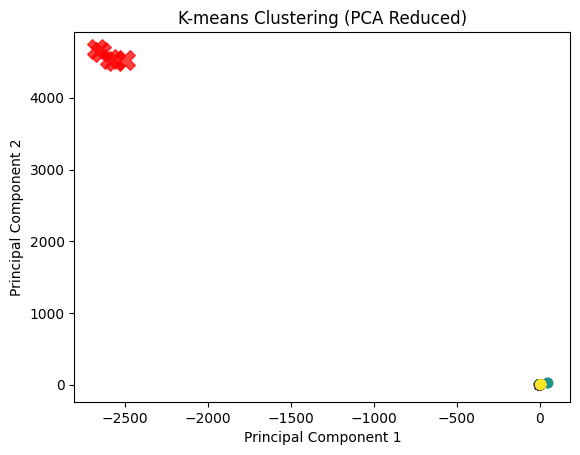

Silhouette Score: 0.3877938091109803


In [5]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit K-means model
k = 5  # Adjust based on your needs
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')

# Plot the cluster centers in PCA-reduced space
centers = kmeans.cluster_centers_
centers_pca = pca.transform(scaler.transform(centers))
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the model
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score}')
